## Prediction of CO2 emission of a vehicle

In this project, we are going to predict the CO2 emission of a vehicle using the different features of a dataset given. The fuel consumption dataset is used for the purpose and is taken from Kaggle. <br>
All the columns in the dataset will be taken as features, using which we will predict the co2 emission and thus co2 emission column is basically our target variable. <br>
As we are doing simple linear regression, so we will be considering single features and will find out the target prediction corresponding to each single feature.

### Import all the necessary modules needed for the evaluation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import the csv file containing the data on fuel consumption

In [5]:
df = pd.read_csv('fuel.csv')        #loading the dataset
df.head()            #looking into  first five records

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.shape           #finding out the shape of the dataset

(1067, 13)

<p> So, we have the dataset with 13 columns, but for our simple linear regression purpose we need fewer columns. Thus, we can reduce the set of columns needed and work only with the desired data. <br>
Let's find out the fuel consumption of the city at first, along with its CO2 emissions, and using vehicle specifications of engine size and cylinders. </p>

In [8]:
data = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'CO2EMISSIONS']]
data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244


#### Let's plot each of the features against the emission to see how the CO2 emission varies with the features.

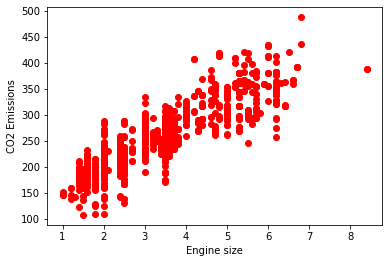

In [11]:
# Plot between the engine size and the co2 emissions

plt.scatter(data.ENGINESIZE, data.CO2EMISSIONS, color='red')
plt.xlabel('Engine size')
plt.ylabel('CO2 Emissions')
plt.show();

From the above graph, it can be seen that the emission increases with the increase in the engine size on an average.

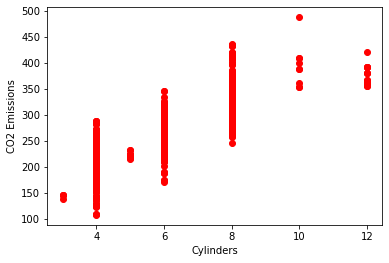

In [12]:
# Plot between the cylinders and the co2 emissions

plt.scatter(data.CYLINDERS, data.CO2EMISSIONS, color='red')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show();

From the above graph, it can be seen that the emission reaches more when the number of cylinders is 10. On an average, the emission is more when the number of cylinders is 12. So, we can say that the emission increases with the increase in number of cylinders.

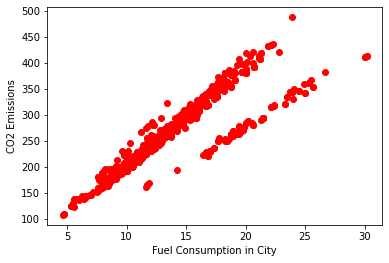

In [13]:
# Plot between the fuel consumption in city and the co2 emissions

plt.scatter(data.FUELCONSUMPTION_CITY, data.CO2EMISSIONS, color='red')
plt.xlabel('Fuel Consumption in City')
plt.ylabel('CO2 Emissions')
plt.show();

From the above graph we can see that the emission increases with the increase in fuel consumption in the city.

### Training and splitting the dataset.

After looking into the dataset and all the data values and how the columns are related to the target column of emission, now it is the time to split the data into train and test dataset. Train data will be used for training the model and test data will be used for evaluation of the model accuracy, and to check if the model can give a high out of sample accuracy. <br>
First we will do the prediction of emission using the engine size column.

In [16]:
mask = np.random.rand(len(data)) < 0.8     #to get randomly generated 80% of the data
train = data[mask]         #80% of the data is taken for training
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
...,...,...,...,...
1062,3.0,6,13.4,271
1063,3.2,6,13.2,264
1064,3.0,6,13.4,271
1065,3.2,6,12.9,260


In [18]:
test = data[~mask]       #rest of the 20% is taken for testing, which do not belong to the training set
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
13,5.9,12,18.0,359
15,4.7,8,18.1,354
17,4.7,8,18.1,354
19,2.0,4,9.9,202
21,2.0,4,10.8,214
...,...,...,...,...
1035,1.8,4,9.4,189
1043,1.8,4,9.9,198
1050,3.6,6,14.2,278
1057,2.5,5,11.6,232


Before progressing, let's see how the training and the testing data set features vary with emission. We will pick on feature for this purpose. Let's look into how the engine size varies with emission for both the training and the testing dataset.

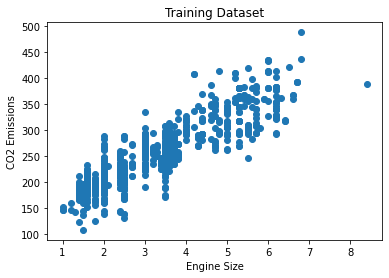

In [19]:
# Using the training dataset

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Training Dataset')
plt.show();

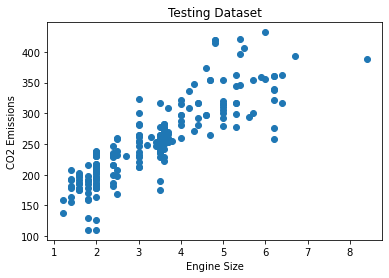

In [20]:
# Using the testing dataset

plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Testing Dataset')
plt.show();

### Modeling the data

Now comes the part where we will model out dataset. That is we will fit the features into the simple linear regression model, so that it can give us an accurate value of the target variable, which in our case is emission data.

In [26]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [27]:
regr.fit(train_x, train_y)

LinearRegression()

In [30]:
print('Coefficient of the Linear regression line is:  ', regr.coef_)
print('Intercept of the Linear regression line is:  ',regr.intercept_)

Coefficient of the Linear regression line is:   [[39.18862932]]
Intercept of the Linear regression line is:   [125.62491529]


#### Now, we will look into how well the predicted line will fit into the data

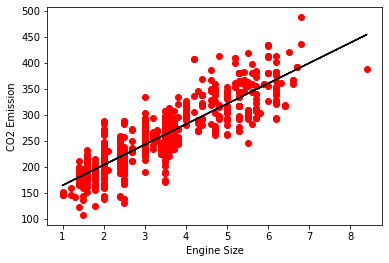

In [32]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
yhat = regr.intercept_ + regr.coef_*train_x
plt.plot(train_x, yhat, color='black')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show();

#### At last, we will evaluate the model accuracy with the test data set.

In [38]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


In [35]:
predict_y = regr.predict(test_x)
predict_y

array([[356.83782829],
       [309.8114731 ],
       [309.8114731 ],
       [204.00217393],
       [204.00217393],
       [204.00217393],
       [204.00217393],
       [204.00217393],
       [282.37943258],
       [282.37943258],
       [204.00217393],
       [290.21715844],
       [290.21715844],
       [243.19080325],
       [282.37943258],
       [282.37943258],
       [204.00217393],
       [204.00217393],
       [204.00217393],
       [204.00217393],
       [204.00217393],
       [204.00217393],
       [243.19080325],
       [243.19080325],
       [243.19080325],
       [204.00217393],
       [243.19080325],
       [243.19080325],
       [243.19080325],
       [298.0548843 ],
       [298.0548843 ],
       [360.75669122],
       [243.19080325],
       [298.0548843 ],
       [298.0548843 ],
       [266.70398085],
       [266.70398085],
       [204.00217393],
       [266.70398085],
       [204.00217393],
       [243.19080325],
       [243.19080325],
       [368.59441709],
       [368

In [40]:
print('Mean Absolute Error:   ', np.mean(np.absolute(test_y - predict_y)))
print('Mean Squared Error:    ', np.mean((test_y - predict_y)**2))
print('R2 Score:    ',r2_score(test_y, predict_y))

Mean Absolute Error:    23.97352074300856
Mean Squared Error:     1103.3011406314042
R2 Score:     0.7363586709932466


Higher the r2 score, greater is the fit of the line. So, we can say that our model predicts the co2 emission for the engine size quite well.

Now, let's train the model for the fuel consumption in city and the co2 emission.

In [47]:
regr1 = LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr1.fit(train_x, train_y)
print('Coefficient of the Linear regression line is:  ', regr1.coef_)
print('Intercept of the Linear regression line is:  ',regr1.intercept_)

Coefficient of the Linear regression line is:   [[13.70633573]]
Intercept of the Linear regression line is:   [74.08271228]


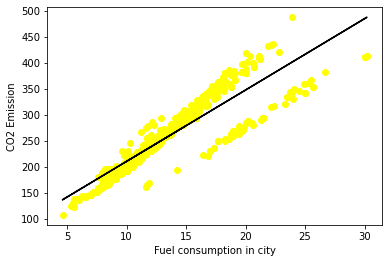

In [52]:
plt.scatter(train_x, train_y, color='yellow')
yhat = regr1.intercept_ + regr1.coef_*train_x
plt.plot(train_x, yhat, color = 'black')
plt.xlabel('Fuel consumption in city')
plt.ylabel('CO2 Emission')
plt.show();

In [53]:
print('Mean Absolute Error:   ', np.mean(np.absolute(train_y - yhat)))
print('Mean Squared Error:    ', np.mean((train_y - yhat)**2))
print('R2 Score:    ',r2_score(train_y, yhat))

Mean Absolute Error:    19.78627295995464
Mean Squared Error:     780.9077179651919
R2 Score:     0.8031034024696516


So, we can see that the model is giving a good prediction for the training dataset. Now let's look for the testing dataset.

In [54]:
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

predict_y = regr1.predict(test_x)
predict_y

array([[320.79675548],
       [322.16738905],
       [322.16738905],
       [209.77543604],
       [222.1111382 ],
       [231.70557321],
       [231.70557321],
       [222.1111382 ],
       [259.11824468],
       [275.56584756],
       [238.55874108],
       [315.31422119],
       [282.41901543],
       [255.00634396],
       [268.71267969],
       [285.16028257],
       [216.62860391],
       [231.70557321],
       [231.70557321],
       [213.88733676],
       [178.25086385],
       [219.36987105],
       [237.18810751],
       [230.33493964],
       [234.44684036],
       [213.88733676],
       [200.18100103],
       [237.18810751],
       [245.41190895],
       [271.45394684],
       [279.67774828],
       [330.39119049],
       [217.99923748],
       [296.12535116],
       [296.12535116],
       [270.08331327],
       [326.27928977],
       [239.92937465],
       [249.52380967],
       [237.18810751],
       [248.15317609],
       [249.52380967],
       [302.97851903],
       [393

In [55]:
print('Mean Absolute Error:   ', np.mean(np.absolute(test_y - predict_y)))
print('Mean Squared Error:    ', np.mean((test_y - predict_y)**2))
print('R2 Score:    ',r2_score(test_y, predict_y))

Mean Absolute Error:    19.083265869052166
Mean Squared Error:     760.6680591987639
R2 Score:     0.8182331816086208


So, the model is giving a good r2 score for the testing dataset as well. Let's look into the plot line visually.

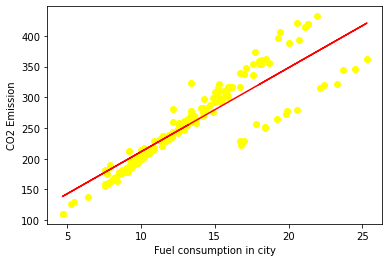

In [57]:
plt.scatter(test_x, test_y, color='yellow')
plt.plot(test_x, predict_y, color='red')
plt.xlabel('Fuel consumption in city')
plt.ylabel('CO2 Emission')
plt.show();

r2 score using engine size is approx 0.74 <br>
r2 score using fuel consumption is approx 0.82 <br>
So, using fuel consumption to predict the co2 emission will be a better choice than engine size.

The same technique can be used using different features to see which feature provides better accuracy in predicting out of sample data.